In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import re #정규표현식
import warnings 
import json
import kss
from konlpy.tag import Okt 
warnings.filterwarnings(action='ignore')

In [34]:
df = pd.read_csv('naver_cafe_speaker_all_data.csv', encoding='utf-8-sig', index_col = 0)

In [35]:
df.head()

,tit,body,comment,time,keyword
Unnamed: 0,,,,,
0,탄노이,예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳 부터 조...,"[['아덴 축하 드립니다 ^^'], ['감사 합니다.'], ['득탬과 동시에 지름 ...",2021.01.30. 23:30,스피커
1,새로운 친구를 들였습니다. (feat 다인오디오 이보크20 Vs B&W 702S2),안녕하세요rose 150 유니코듀에 B&W 702S2로 만족하면서 듣고 있던중여러...,"[['마음을 울리는 소리 저도 느끼고 싶어요..'], ['다인오디오 한번 들어보실만...",2021.01.30. 23:03,스피커
2,올해 음반은 이제 멈추려합니다.,드보르작 연주가 좋아서 부페오와 이반 피셔의 연주반을 모았네요. 이제 음반 헌팅은 ...,"[['음반욕심은 이상하게 끊어지지를 않네요~^^'], ['그니깐요^~^'], ['...",2021.01.30. 20:30,스피커
3,Bryston 4B-sst2 파워앰프 + Schiit Freya plus 구입했습니다.,잘지내셨나요? ㅎ한동안 음악만 듣고 뽐뿌는 안받을려고 6개월 정도는 두우오를 외면 ...,"[['멋지네요'], ['감사합니다. 미천합니다'], ['멋집니다..틸에 브라이스턴이...",2021.01.30. 18:20,스피커
4,오린이가 피에가 프리미엄 501 질렀어요.,두두오에 가입한 지 얼마 안 되는 오린입니다. 아침밥 먹고 쉬고 있는데 택배가 왔더...,"[[''], ['감사합니다.'], ['외관이 멋지면 당연히 소리도 좋겠지요. 축하드...",2021.01.30. 18:19,스피커


In [36]:
print(df.isnull().sum())

tit        0
body       1
comment    0
time       0
keyword    0
dtype: int64


In [37]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 

print(df.isnull().values.any())

False


In [38]:
df['doc'] = df['tit'] + ' ' + df['body'] + ' ' + df['comment']
df

,tit,body,comment,time,keyword,doc
Unnamed: 0,,,,,,
0,탄노이,예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳 부터 조...,"[['아덴 축하 드립니다 ^^'], ['감사 합니다.'], ['득탬과 동시에 지름 ...",2021.01.30. 23:30,스피커,탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳 ...
1,새로운 친구를 들였습니다. (feat 다인오디오 이보크20 Vs B&W 702S2),안녕하세요rose 150 유니코듀에 B&W 702S2로 만족하면서 듣고 있던중여러...,"[['마음을 울리는 소리 저도 느끼고 싶어요..'], ['다인오디오 한번 들어보실만...",2021.01.30. 23:03,스피커,새로운 친구를 들였습니다. (feat 다인오디오 이보크20 Vs B&W 702S2)...
2,올해 음반은 이제 멈추려합니다.,드보르작 연주가 좋아서 부페오와 이반 피셔의 연주반을 모았네요. 이제 음반 헌팅은 ...,"[['음반욕심은 이상하게 끊어지지를 않네요~^^'], ['그니깐요^~^'], ['...",2021.01.30. 20:30,스피커,올해 음반은 이제 멈추려합니다. 드보르작 연주가 좋아서 부페오와 이반 피셔의 연주반...
3,Bryston 4B-sst2 파워앰프 + Schiit Freya plus 구입했습니다.,잘지내셨나요? ㅎ한동안 음악만 듣고 뽐뿌는 안받을려고 6개월 정도는 두우오를 외면 ...,"[['멋지네요'], ['감사합니다. 미천합니다'], ['멋집니다..틸에 브라이스턴이...",2021.01.30. 18:20,스피커,Bryston 4B-sst2 파워앰프 + Schiit Freya plus 구입했습니...
4,오린이가 피에가 프리미엄 501 질렀어요.,두두오에 가입한 지 얼마 안 되는 오린입니다. 아침밥 먹고 쉬고 있는데 택배가 왔더...,"[[''], ['감사합니다.'], ['외관이 멋지면 당연히 소리도 좋겠지요. 축하드...",2021.01.30. 18:19,스피커,오린이가 피에가 프리미엄 501 질렀어요. 두두오에 가입한 지 얼마 안 되는 오린입...
...,...,...,...,...,...,...
795,[런던오디오] 언바란스 인터케이블(Hybrid-R) 체험이벤트 후기,https://cafe.naver.com/common/storyphoto/viewe...,"[['정성어린 상세한 후기에 진심으로 감사드립니다.^^'], ['후기 잘 봤습니다~...",2021.01.16. 23:46,스피커,[런던오디오] 언바란스 인터케이블(Hybrid-R) 체험이벤트 후기 https://...
796,문의) 에코세스피커케이블 vs. 오디오퀘스트케이블 문의,안녕하세요?에코세 MS2.15 스피커케이블과 오디오퀘스트 로켓44 케이블이 유사한 ...,[],2021.01.13. 10:31,스피커,문의) 에코세스피커케이블 vs. 오디오퀘스트케이블 문의 안녕하세요?에코세 MS2.1...
797,바이와이어링을 하니까 파바로티의 목소리가 고역에서 금속성의 소리가 덜 나옵니다.,위의 사진은 네오텍 NS-1410 스피커 케이블의 사진입니다. 4일 전에 샀습니다....,[['중역이 좋아 진것 같네요올라가지도 않는 노래를억지로 부르는 노래방 소리에서해방...,2021.01.11. 17:47,스피커,바이와이어링을 하니까 파바로티의 목소리가 고역에서 금속성의 소리가 덜 나옵니다. 위...


In [39]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [40]:
len(df)

10194

In [41]:
df.loc[0, 'doc']

'탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳 부터 조용히 밀고 들어와 그게 다가 아니야라고 조용히 알려주던 탄노이. 그러나 그시절 서민 아파트 한채값이라 그냥 "와" 하고 듣는걸로 만족했던 탄노이.인연이 안되서 구해지지 않더니 잠복하니 구해지네요. [[\'아덴 축하 드립니다 ^^\'], [\'감사 합니다.\'], [\'득탬과 동시에 지름 축하드립니다^^\'], [\'넵! 고속도로 잘못 들어 고생은 했지만 좋습니다.\'], [\'탄노이 브로~\'], [\'멋집니다.^^\'], [\'\'], [\'\'], [\'감사 합니다.\'], [\'저도 탄노이 씁니다. 동축 처음 들었을때 그 자연스러움과 풍부함에 놀랐지요. 그동안 왜 유닛들 귀대보며 밸런스 찾고 고생했었나 싶더라구요. 탄노이 쓴 이후로 스피커 바꾸고 싶은 마음이 사라졌어요\'], [\'소리가 정말 좋습니다. 오랜세월 탓에 요즘 스픽처럼 산뜻하진 못하지만 소리로 다 카바 해 버리네요.\'], [\'좋은 스피커 영입 축하드립니다. 더이상 스피커에 대한 갈망은 없으실듯하네요\'], [\'psb t3, 탄노이 아덴. jbl L7, 이걸로 끝내야겠지요!!\'], [\'멋지네요.. 축하드립니다..^^\'], [\'감사 합니다.\'], [\'축하드려요\'], [\'네. 고마워요\'], [\'축하드립니다 아덴과 턴베리 고민중이다가 얼마전에 턴베리를샀는데 아덴이 궁금해집니다뭐가 다른지?오린이는 그래서 웁니다 흑흑\'], [\'기회되면 언제고 청음 환영합니다.\\n직접 들어 보는것이 최선일듯 합니다.\'], [\'그럼 전 거꾸로 샀네요팝 가요가 주이고 클래식은 가끔인데ㅠ이리저리 웁니다 흑흑\'], [\'감사합니다 기회되면 가겠습니다\'], [\'넵! 미리 쪽지 주시면 기다리겠습니다.\'], [\'저도 탄노이 어릴때부터 좋아했는데 멋집니다 ^^\'], [\'모양새가 둔한 느낌이 있어요\'], [\'축하드립니다^^\'], [\'넵!! 감사 합니다.\'], [\'축하드립니다~! 탄노이는 역시

In [42]:
def clean_str(text): #함수로 정의해둠
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\.]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    #pattern = '[^가-힣 ]'         # 한글만 남기고 특수문자, 숫자, 영문 삭제
    #text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [43]:
for i in range(len(df)):
    df.doc.iloc[i] = clean_str(df.doc.iloc[i])

In [44]:
df.loc[0, 'doc']

'탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳 부터 조용히 밀고 들어와 그게 다가 아니야라고 조용히 알려주던 탄노이. 그러나 그시절 서민 아파트 한채값이라 그냥 와 하고 듣는걸로 만족했던 탄노이.인연이 안되서 구해지지 않더니 잠복하니 구해지네요. 아덴 축하 드립니다  감사 합니다. 득탬과 동시에 지름 축하드립니다 넵 고속도로 잘못 들어 고생은 했지만 좋습니다. 탄노이 브로 멋집니다.   감사 합니다. 저도 탄노이 씁니다. 동축 처음 들었을때 그 자연스러움과 풍부함에 놀랐지요. 그동안 왜 유닛들 귀대보며 밸런스 찾고 고생했었나 싶더라구요. 탄노이 쓴 이후로 스피커 바꾸고 싶은 마음이 사라졌어요 소리가 정말 좋습니다. 오랜세월 탓에 요즘 스픽처럼 산뜻하진 못하지만 소리로 다 카바 해 버리네요. 좋은 스피커 영입 축하드립니다. 더이상 스피커에 대한 갈망은 없으실듯하네요 psb t3 탄노이 아덴. jbl L7 이걸로 끝내야겠지요 멋지네요.. 축하드립니다.. 감사 합니다. 축하드려요 네. 고마워요 축하드립니다 아덴과 턴베리 고민중이다가 얼마전에 턴베리를샀는데 아덴이 궁금해집니다뭐가 다른지오린이는 그래서 웁니다 흑흑 기회되면 언제고 청음 환영합니다.n직접 들어 보는것이 최선일듯 합니다. 그럼 전 거꾸로 샀네요팝 가요가 주이고 클래식은 가끔인데이리저리 웁니다 흑흑 감사합니다 기회되면 가겠습니다 넵 미리 쪽지 주시면 기다리겠습니다. 저도 탄노이 어릴때부터 좋아했는데 멋집니다  모양새가 둔한 느낌이 있어요 축하드립니다 넵 감사 합니다. 축하드립니다 탄노이는 역시 탄노이지요 하동에 사시는가 봅니다nn그런데 유닛 볼트가 반은 체결이 안되어 있는데 무순 사연이 있는지요 체결된것이 다 인가 봐요. 다른것도 4개만 되 있어요.아무래도 엣지 수리는 한거 같아요 엣지는 소모품이니 가는것이 좋은데 어디서 어떤엣지로 갈았냐가 중요합니다 유닛이 무엇인지요 콘지상태 및 전체적인 상태 좋아보입니다 탄노이 체비엇이나 아덴만 되도 충분하다고 생각 합니다n다시한번 

In [47]:
df['doc_n'] = df['doc'].apply(lambda x: kss.split_sentences(x, num_workers=1))

[Korean Sentence Splitter]: Initializing Pynori...


In [48]:
df.to_csv('naver_cafe_speaker_all_data_split_sentence.csv',index=False, encoding='utf-8-sig')

In [3]:
df = pd.read_csv('naver_cafe_speaker_all_data_split_sentence.csv', encoding='utf-8-sig')

In [4]:
df['doc_n']

0        ['탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은...
1        ['새로운 친구를 들였습니다.', 'feat 다인오디오 이보크20 Vs BW 702...
2        ['올해 음반은 이제 멈추려합니다.', '드보르작 연주가 좋아서 부페오와 이반 피셔...
3        ['Bryston 4Bsst2 파워앰프 Schiit Freya plus 구입했습니다...
4        ['오린이가 피에가 프리미엄 501 질렀어요.', '두두오에 가입한 지 얼마 안 되...
                               ...                        
10189    ['런던오디오 언바란스 인터케이블HybridR 체험이벤트 후기 commonstory...
10190    ['문의 에코세스피커케이블 vs. 오디오퀘스트케이블 문의 안녕하세요', '에코세 M...
10191    ['바이와이어링을 하니까 파바로티의 목소리가 고역에서 금속성의 소리가 덜 나옵니다....
10192    ['소름이 쫙쫙 돋습니다', '벤션 CAT.8 1.5미터 소리가 뚫렸습니다', '_...
10193    ['이소텍 EVO3 폴라리스 멀티탭 이소텍 EVO3 프리미어 파워케이블 구입했습니다...
Name: doc_n, Length: 10194, dtype: object

In [5]:
def merge_into_one_sentence(sent_list):
    sent_str = ", ".join(sent_list)
    sent_str = "[" + sent_str[0:]
    sent_str = sent_str + ']'
    return sent_str

In [6]:
df['doc_n_str'] = df['doc_n'].apply(lambda x: merge_into_one_sentence(eval(x)))
df['doc_n_str']

0        [탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳...
1        [새로운 친구를 들였습니다., feat 다인오디오 이보크20 Vs BW 702S2 ...
2        [올해 음반은 이제 멈추려합니다., 드보르작 연주가 좋아서 부페오와 이반 피셔의 연...
3        [Bryston 4Bsst2 파워앰프 Schiit Freya plus 구입했습니다....
4        [오린이가 피에가 프리미엄 501 질렀어요., 두두오에 가입한 지 얼마 안 되는 오...
                               ...                        
10189    [런던오디오 언바란스 인터케이블HybridR 체험이벤트 후기 commonstoryp...
10190    [문의 에코세스피커케이블 vs. 오디오퀘스트케이블 문의 안녕하세요, 에코세 MS2....
10191    [바이와이어링을 하니까 파바로티의 목소리가 고역에서 금속성의 소리가 덜 나옵니다.,...
10192    [소름이 쫙쫙 돋습니다, 벤션 CAT.8 1.5미터 소리가 뚫렸습니다, ___ 역시...
10193    [이소텍 EVO3 폴라리스 멀티탭 이소텍 EVO3 프리미어 파워케이블 구입했습니다....
Name: doc_n_str, Length: 10194, dtype: object

In [7]:
def remove_num(sent):
    p=re.compile("[0-9]+")    
    return p.sub(" ", sent)

In [8]:
df['doc_n_str']=df['doc_n_str'].apply(lambda x: remove_num(x))

In [9]:
df['doc_n_str']

0        [탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳...
1        [새로운 친구를 들였습니다., feat 다인오디오 이보크  Vs BW  S  안녕하...
2        [올해 음반은 이제 멈추려합니다., 드보르작 연주가 좋아서 부페오와 이반 피셔의 연...
3        [Bryston  Bsst  파워앰프 Schiit Freya plus 구입했습니다....
4        [오린이가 피에가 프리미엄   질렀어요., 두두오에 가입한 지 얼마 안 되는 오린입...
                               ...                        
10189    [런던오디오 언바란스 인터케이블HybridR 체험이벤트 후기 commonstoryp...
10190    [문의 에코세스피커케이블 vs. 오디오퀘스트케이블 문의 안녕하세요, 에코세 MS ....
10191    [바이와이어링을 하니까 파바로티의 목소리가 고역에서 금속성의 소리가 덜 나옵니다.,...
10192    [소름이 쫙쫙 돋습니다, 벤션 CAT.   . 미터 소리가 뚫렸습니다, ___ 역시...
10193    [이소텍 EVO  폴라리스 멀티탭 이소텍 EVO  프리미어 파워케이블 구입했습니다....
Name: doc_n_str, Length: 10194, dtype: object

In [10]:
def remove_punc(sent):
    sentence_list = []    
    p = re.compile("\W+")
    sentence_list.append(p.sub(" ", sent))
    return sentence_list

df['doc_n_str'] = df['doc_n_str'].apply(lambda x: remove_punc(x))

In [11]:
df['doc_n_str']

0        [ 탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은...
1        [ 새로운 친구를 들였습니다 feat 다인오디오 이보크 Vs BW S 안녕하세요 r...
2        [ 올해 음반은 이제 멈추려합니다 드보르작 연주가 좋아서 부페오와 이반 피셔의 연주...
3        [ Bryston Bsst 파워앰프 Schiit Freya plus 구입했습니다 잘...
4        [ 오린이가 피에가 프리미엄 질렀어요 두두오에 가입한 지 얼마 안 되는 오린입니다 ...
                               ...                        
10189    [ 런던오디오 언바란스 인터케이블HybridR 체험이벤트 후기 commonstory...
10190    [ 문의 에코세스피커케이블 vs 오디오퀘스트케이블 문의 안녕하세요 에코세 MS 스피...
10191    [ 바이와이어링을 하니까 파바로티의 목소리가 고역에서 금속성의 소리가 덜 나옵니다 ...
10192    [ 소름이 쫙쫙 돋습니다 벤션 CAT 미터 소리가 뚫렸습니다 ___ 역시 최소 일은...
10193    [ 이소텍 EVO 폴라리스 멀티탭 이소텍 EVO 프리미어 파워케이블 구입했습니다 안...
Name: doc_n_str, Length: 10194, dtype: object

In [12]:
df.loc[0, 'doc_n_str']

[' 탄노이 예전에 마란츠와JBL이 세상에서 제일 좋은 전축이라 알던시절에 가슴 깊은곳 부터 조용히 밀고 들어와 그게 다가 아니야라고 조용히 알려주던 탄노이 그러나 그시절 서민 아파트 한채값이라 그냥 와 하고 듣는걸로 만족했던 탄노이 인연이 안되서 구해지지 않더니 잠복하니 구해지네요 아덴 축하 드립니다 감사 합니다 득탬과 동시에 지름 축하드립니다 넵 고속도로 잘못 들어 고생은 했지만 좋습니다 탄노이 브로 멋집니다 감사 합니다 저도 탄노이 씁니다 동축 처음 들었을때 그 자연스러움과 풍부함에 놀랐지요 그동안 왜 유닛들 귀대보며 밸런스 찾고 고생했었나 싶더라구요 탄노이 쓴 이후로 스피커 바꾸고 싶은 마음이 사라졌어요 소리가 정말 좋습니다 오랜세월 탓에 요즘 스픽처럼 산뜻하진 못하지만 소리로 다 카바 해 버리네요 좋은 스피커 영입 축하드립니다 더이상 스피커에 대한 갈망은 없으실듯하네요 psb t 탄노이 아덴 jbl L 이걸로 끝내야겠지요 멋지네요 축하드립니다 감사 합니다 축하드려요 네 고마워요 축하드립니다 아덴과 턴베리 고민중이다가 얼마전에 턴베리를샀는데 아덴이 궁금해집니다 뭐가 다른지오린이는 그래서 웁니다 흑흑 기회되면 언제고 청음 환영합니다 n직접 들어 보는것이 최선일듯 합니다 그럼 전 거꾸로 샀네요 팝 가요가 주이고 클래식은 가끔인데이리저리 웁니다 흑흑 감사합니다 기회되면 가겠습니다 넵 미리 쪽지 주시면 기다리겠습니다 저도 탄노이 어릴때부터 좋아했는데 멋집니다 모양새가 둔한 느낌이 있어요 축하드립니다 넵 감사 합니다 축하드립니다 탄노이는 역시 탄노이지요 하동에 사시는가 봅니다nn그런데 유닛 볼트가 반은 체결이 안되어 있는데 무순 사연이 있는지요 체결된것이 다 인가 봐요 다른것도 개만 되 있어요 아무래도 엣지 수리는 한거 같아요 엣지는 소모품이니 가는것이 좋은데 어디서 어떤엣지로 갈았냐가 중요합니다 유닛이 무엇인지요 콘지상태 및 전체적인 상태 좋아보입니다 탄노이 체비엇이나 아덴만 되도 충분하다고 생각 합니다 n다시한번 축하드립니다 소리에 걸리는겻이 없어서 가져왔어

In [13]:
# 명사만 추출
from konlpy.tag import Okt  
okt=Okt()  

def noun_selection(sent_list):    
    sent_tokens=[]
    for sentence in sent_list:
        sent_tokens.append(okt.nouns(sentence))
    return(sent_tokens)

#nouns = noun_selection(df.loc[0, 'doc_n_str'])
df['doc_n_str_nouns'] = df['doc_n_str'].apply(lambda x: noun_selection(x))

In [14]:
df['doc_n_str_nouns']

0        [[예전, 마란츠, 이, 세상, 제일, 전축, 시절, 가슴, 곳, 부터, 밀고, 그...
1        [[친구, 다인, 오디오, 보크, 유니코듀, 로, 중, 여러, 회원, 다인, 오디오...
2        [[올해, 음반, 이제, 드보르작, 연주가, 부페, 오, 이반, 피셔, 주반, 이제...
3        [[파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, ...
4        [[린, 피, 프리미엄, 오, 가입, 얼마, 안, 린, 아침밥, 쉬, 택배, 얼마나...
                               ...                        
10189    [[런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세...
10190    [[문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, ...
10191    [[바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍...
10192    [[소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 일, 하나, 진득, 음악, 성도...
10193    [[텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코...
Name: doc_n_str_nouns, Length: 10194, dtype: object

In [44]:
#df.to_csv('naver_cafe_speaker_all_data_split_sentence_noun.csv', encoding='utf-8-sig')

In [45]:
#df = pd.read_csv('naver_cafe_speaker_all_data_split_sentence_noun.csv', encoding='utf-8-sig')

In [15]:
with open('korean_stopword.json',encoding='utf8') as f:
    stopwords = json.load(f)

stopwords.extend(['안','수','거','왜','것','후','에서','고','이다','는','한','안녕','형','안녕하다','형님','건','안','요','거','피','질','번','용','군','영','스','좀','데','듯','넉','테','런','하다','하나요'])

In [16]:
def rem_n_stopwords(sent_list):
    sent_stop=[]
    for sentence in sent_list:
        new_sent=[]
        for token in sentence:
            if token not in stopwords:
                new_sent.append(token)
        sent_stop.append(new_sent)
    return(sent_stop)

In [17]:
df['doc_n_str_nouns'] = df['doc_n_str_nouns'].apply(lambda x: rem_n_stopwords(x))

In [18]:
df['doc_n_str_nouns']

0        [[예전, 마란츠, 세상, 제일, 전축, 시절, 가슴, 곳, 밀고, 그게, 다가, ...
1        [[친구, 다인, 오디오, 보크, 유니코듀, 중, 여러, 회원, 다인, 오디오, 보...
2        [[올해, 음반, 이제, 드보르작, 연주가, 부페, 이반, 피셔, 주반, 이제, 음...
3        [[파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, ...
4        [[린, 프리미엄, 가입, 린, 아침밥, 쉬, 택배, 버선, 발, 관, 짝, 두, ...
                               ...                        
10189    [[런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세...
10190    [[문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, ...
10191    [[바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍...
10192    [[소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 진득, 음악, 성도, 소리, 선...
10193    [[텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코...
Name: doc_n_str_nouns, Length: 10194, dtype: object

In [19]:
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

In [20]:
df['doc_n_str_nouns'] = df['doc_n_str_nouns'].apply(lambda x: one_word_list(x))

In [21]:
df['doc_n_str_nouns']

0        [예전, 마란츠, 세상, 제일, 전축, 시절, 가슴, 곳, 밀고, 그게, 다가, 시...
1        [친구, 다인, 오디오, 보크, 유니코듀, 중, 여러, 회원, 다인, 오디오, 보크...
2        [올해, 음반, 이제, 드보르작, 연주가, 부페, 이반, 피셔, 주반, 이제, 음반...
3        [파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, 가...
4        [린, 프리미엄, 가입, 린, 아침밥, 쉬, 택배, 버선, 발, 관, 짝, 두, 개...
                               ...                        
10189    [런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세,...
10190    [문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, 스...
10191    [바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍,...
10192    [소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 진득, 음악, 성도, 소리, 선재...
10193    [텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코비...
Name: doc_n_str_nouns, Length: 10194, dtype: object

In [22]:
df['doc_n_str_nouns_one_word_list'] = df['doc_n_str_nouns']

In [54]:
#df['doc_n_str_nouns_one_word_list']

In [55]:
#df.to_csv('naver_cafe_speaker_all_data_split_sentence_noun_one_word_list.csv', encoding='utf-8-sig')

In [23]:
total_word=[]
for i in range(len(df)):
    total_word.extend(df.loc[i,'doc_n_str_nouns'])

pd.Series(total_word).value_counts().head(15)

스피커    41868
앰프     28830
소리     21343
사용     15456
더      12131
생각     11366
오디오    11080
케이블    10410
정도      9191
추천      9003
축하      7441
연결      7353
제품      7111
음악      7020
가격      5942
dtype: int64

<AxesSubplot:>

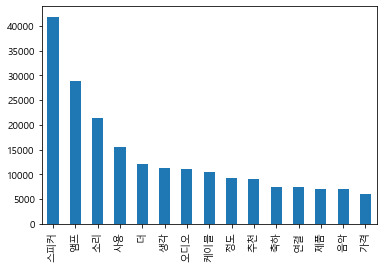

In [24]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')

In [25]:
df['doc_n_str_nouns_str'] = df['doc_n_str_nouns'].apply(lambda x: " ".join(x))

In [26]:
df['doc_n_str_nouns_str']

0        예전 마란츠 세상 제일 전축 시절 가슴 곳 밀고 그게 다가 시절 서민 아파트 채값 ...
1        친구 다인 오디오 보크 유니코듀 중 여러 회원 다인 오디오 보크 후기 비청 영상 세...
2        올해 음반 이제 드보르작 연주가 부페 이반 피셔 주반 이제 음반 헌팅 당분간 올해 ...
3        파워 앰프 구입 음악 뽐뿌 개월 정도 두우 외면 어제 몇개 가성 비 중심 중고 구입...
4        린 프리미엄 가입 린 아침밥 쉬 택배 버선 발 관 짝 두 개 날 외관 소리 축하 누...
                               ...                        
10189       런던 오디오 바 란스 인터 케이블 체험 이벤트 후기 정성 상세 후기 진심 감사 후기
10190    문의 에코 스피커 케이블 오디오 퀘스트 케이블 문의 에코 세 스피커 케이블 오디오 ...
10191    바이 이어링 파바로티 목소리 고역 금속성 소리 덜 위 사진 텍 스피커 케이블 사진 ...
10192    소름 쫙쫙 션 미터 소리 역시 최소 진득 음악 성도 소리 선재 중 세 손가락 만족감...
10193    텍 폴라리스 멀티탭 텍 프리미어 파워 케이블 구입 신입 쇼스타코비치 오늘 텍 멀티탭...
Name: doc_n_str_nouns_str, Length: 10194, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
count_dtm = vector.fit_transform(df['doc_n_str_nouns_str']).toarray() 
print(count_dtm.shape)
print(vector.vocabulary_)

(10194, 31731)
{'예전': 19266, '마란츠': 8131, '세상': 14333, '제일': 23731, '전축': 23311, '시절': 16102, '가슴': 119, '밀고': 10076, '그게': 2565, '다가': 4768, '서민': 13915, '아파트': 17087, '채값': 25479, '그냥': 2571, '는걸': 4659, '인연': 21874, '구해': 2307, '지지': 24709, '잠복': 22678, '해지': 30500, '아덴': 16814, '축하': 26118, '감사': 408, '득탬': 6438, '동시': 6027, '지름': 24615, '고속도로': 1454, '잘못': 22655, '고생': 1449, '브로': 12342, '처음': 25560, '그동안': 2585, '유닛': 20748, '대보': 5263, '밸런스': 10876, '이후': 21752, '스피커': 15765, '마음': 8212, '소리': 14637, '정말': 23497, '세월': 14344, '요즘': 20043, '스픽': 15780, '카바': 26432, '대한': 5380, '갈망': 363, '베리': 11171, '고민': 1435, '중이': 24434, '지오': 24675, '웁니': 20330, '기회': 3109, '청음': 25732, '환영': 31281, '직접': 24806, '최선일': 25988, '거꾸로': 750, '가요': 142, '클래식': 27324, '가끔': 25, '미리': 9941, '쪽지': 25173, '주시': 24232, '모양새': 9199, '느낌': 4639, '역시': 18950, '노이지': 4338, '하동': 29941, '볼트': 11731, '체결': 25761, '무순': 9526, '사연': 13173, '엣지': 18809, '수리': 15014, '소모품': 14661, '인지': 21899, '상태': 13627, '전체'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(df['doc_n_str_nouns_str'])
tfidv_dtm = tfidfv.transform(df['doc_n_str_nouns_str']).toarray()
print(tfidv_dtm.shape)
print(tfidfv.vocabulary_)

(10194, 31731)
{'예전': 19266, '마란츠': 8131, '세상': 14333, '제일': 23731, '전축': 23311, '시절': 16102, '가슴': 119, '밀고': 10076, '그게': 2565, '다가': 4768, '서민': 13915, '아파트': 17087, '채값': 25479, '그냥': 2571, '는걸': 4659, '인연': 21874, '구해': 2307, '지지': 24709, '잠복': 22678, '해지': 30500, '아덴': 16814, '축하': 26118, '감사': 408, '득탬': 6438, '동시': 6027, '지름': 24615, '고속도로': 1454, '잘못': 22655, '고생': 1449, '브로': 12342, '처음': 25560, '그동안': 2585, '유닛': 20748, '대보': 5263, '밸런스': 10876, '이후': 21752, '스피커': 15765, '마음': 8212, '소리': 14637, '정말': 23497, '세월': 14344, '요즘': 20043, '스픽': 15780, '카바': 26432, '대한': 5380, '갈망': 363, '베리': 11171, '고민': 1435, '중이': 24434, '지오': 24675, '웁니': 20330, '기회': 3109, '청음': 25732, '환영': 31281, '직접': 24806, '최선일': 25988, '거꾸로': 750, '가요': 142, '클래식': 27324, '가끔': 25, '미리': 9941, '쪽지': 25173, '주시': 24232, '모양새': 9199, '느낌': 4639, '역시': 18950, '노이지': 4338, '하동': 29941, '볼트': 11731, '체결': 25761, '무순': 9526, '사연': 13173, '엣지': 18809, '수리': 15014, '소모품': 14661, '인지': 21899, '상태': 13627, '전체'

In [29]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns'])
print(dictionary)

Dictionary(33087 unique tokens: ['가끔', '가슴', '가요', '갈망', '감사']...)


In [30]:
print(dictionary.doc2bow(df.loc[0,'doc_n_str_nouns']))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 3), (59, 1), (60, 2), (61, 6), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 12), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2)

In [31]:
corpus = [dictionary.doc2bow(text) for text in df['doc_n_str_nouns']]

print(corpus[0])

for i in range(5):
    print(dictionary[i])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 3), (59, 1), (60, 2), (61, 6), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 12), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2)

In [163]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,30):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda =CoherenceModel(model=ldamodel, texts=df['doc_n_str_nouns'], dictionary = dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number o

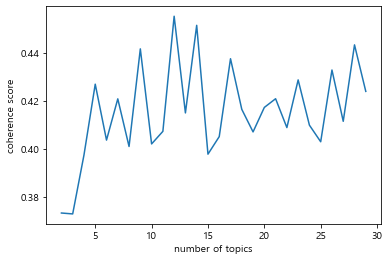

In [164]:
x=range(2,30)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show() 

In [32]:
import gensim
import matplotlib.pyplot as plt

NUM_TOPICS = 12 #12개의 토픽, k=12
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
print(topics)

[(0, '0.085*"랜" + 0.077*"허브" + 0.075*"공유기" + 0.052*"랜선"'), (1, '0.033*"소리" + 0.013*"느낌" + 0.011*"진공관" + 0.011*"앰프"'), (2, '0.048*"스피커" + 0.031*"앰프" + 0.018*"추천" + 0.018*"사용"'), (3, '0.096*"채널" + 0.080*"리시버" + 0.062*"사운드" + 0.057*"티비"'), (4, '0.076*"케이블" + 0.033*"스피커" + 0.026*"단자" + 0.022*"선"'), (5, '0.116*"앰프" + 0.045*"스피커" + 0.037*"프리" + 0.029*"파워"'), (6, '0.022*"노이즈" + 0.021*"사용" + 0.019*"소리" + 0.015*"기기"'), (7, '0.061*"스피커" + 0.016*"소리" + 0.014*"우퍼" + 0.014*"저음"'), (8, '0.030*"연결" + 0.026*"네트워크" + 0.026*"음질" + 0.026*"타이"'), (9, '0.094*"사부" + 0.072*"작" + 0.040*"딩" + 0.034*"포스트"'), (10, '0.049*"축하" + 0.013*"정말" + 0.011*"전" + 0.009*"집"'), (11, '0.021*"스피커" + 0.019*"소리" + 0.018*"앰프" + 0.015*"생각"')]


In [33]:
for topic in topics:
    print(topic)

(0, '0.085*"랜" + 0.077*"허브" + 0.075*"공유기" + 0.052*"랜선"')
(1, '0.033*"소리" + 0.013*"느낌" + 0.011*"진공관" + 0.011*"앰프"')
(2, '0.048*"스피커" + 0.031*"앰프" + 0.018*"추천" + 0.018*"사용"')
(3, '0.096*"채널" + 0.080*"리시버" + 0.062*"사운드" + 0.057*"티비"')
(4, '0.076*"케이블" + 0.033*"스피커" + 0.026*"단자" + 0.022*"선"')
(5, '0.116*"앰프" + 0.045*"스피커" + 0.037*"프리" + 0.029*"파워"')
(6, '0.022*"노이즈" + 0.021*"사용" + 0.019*"소리" + 0.015*"기기"')
(7, '0.061*"스피커" + 0.016*"소리" + 0.014*"우퍼" + 0.014*"저음"')
(8, '0.030*"연결" + 0.026*"네트워크" + 0.026*"음질" + 0.026*"타이"')
(9, '0.094*"사부" + 0.072*"작" + 0.040*"딩" + 0.034*"포스트"')
(10, '0.049*"축하" + 0.013*"정말" + 0.011*"전" + 0.009*"집"')
(11, '0.021*"스피커" + 0.019*"소리" + 0.018*"앰프" + 0.015*"생각"')


In [34]:
for topic in ldamodel.print_topics():
    print(topic)

(0, '0.085*"랜" + 0.077*"허브" + 0.075*"공유기" + 0.052*"랜선" + 0.028*"드라이버" + 0.027*"데이브" + 0.014*"관세" + 0.011*"윈도우" + 0.010*"유선" + 0.010*"모뎀"')
(1, '0.033*"소리" + 0.013*"느낌" + 0.011*"진공관" + 0.011*"앰프" + 0.011*"더" + 0.010*"생각" + 0.007*"사용" + 0.007*"정도" + 0.007*"관" + 0.007*"용기"')
(2, '0.048*"스피커" + 0.031*"앰프" + 0.018*"추천" + 0.018*"사용" + 0.014*"제품" + 0.013*"오디오" + 0.011*"만원" + 0.011*"구매" + 0.011*"정도" + 0.010*"음악"')
(3, '0.096*"채널" + 0.080*"리시버" + 0.062*"사운드" + 0.057*"티비" + 0.048*"영화" + 0.036*"바" + 0.035*"센터" + 0.026*"뮤" + 0.022*"션" + 0.018*"리"')
(4, '0.076*"케이블" + 0.033*"스피커" + 0.026*"단자" + 0.022*"선" + 0.015*"포노" + 0.012*"연결" + 0.012*"소리" + 0.011*"사용" + 0.010*"쪽" + 0.010*"선재"')
(5, '0.116*"앰프" + 0.045*"스피커" + 0.037*"프리" + 0.029*"파워" + 0.025*"출력" + 0.023*"볼륨" + 0.018*"사용" + 0.015*"모노" + 0.015*"인티" + 0.012*"옴"')
(6, '0.022*"노이즈" + 0.021*"사용" + 0.019*"소리" + 0.015*"기기" + 0.014*"전원" + 0.012*"문제" + 0.010*"디지털" + 0.009*"제품" + 0.008*"생각" + 0.008*"소스"')
(7, '0.061*"스피커" + 0.016*"소리" + 0.014*"우퍼" + 0.014

In [35]:
#df = pd.read_csv('naver_cafe_speaker_all_data_split_sentence_noun_one_word_list.csv', encoding='utf-8-sig')

In [36]:
df['doc_n_str_nouns_one_word_list']

0        [예전, 마란츠, 세상, 제일, 전축, 시절, 가슴, 곳, 밀고, 그게, 다가, 시...
1        [친구, 다인, 오디오, 보크, 유니코듀, 중, 여러, 회원, 다인, 오디오, 보크...
2        [올해, 음반, 이제, 드보르작, 연주가, 부페, 이반, 피셔, 주반, 이제, 음반...
3        [파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, 가...
4        [린, 프리미엄, 가입, 린, 아침밥, 쉬, 택배, 버선, 발, 관, 짝, 두, 개...
                               ...                        
10189    [런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세,...
10190    [문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, 스...
10191    [바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍,...
10192    [소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 진득, 음악, 성도, 소리, 선재...
10193    [텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코비...
Name: doc_n_str_nouns_one_word_list, Length: 10194, dtype: object

In [37]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns_one_word_list'])
print(dictionary)

Dictionary(33087 unique tokens: ['가끔', '가슴', '가요', '갈망', '감사']...)


In [38]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns_one_word_list'])
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in df['doc_n_str_nouns_one_word_list']]

NUM_TOPICS = 12 #12개의 토픽, k=12
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

Dictionary(33087 unique tokens: ['가끔', '가슴', '가요', '갈망', '감사']...)


In [39]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
prepared_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.117424 -0.071392       1        1  30.802479
1      0.050117 -0.186172       2        1  14.417333
0      0.112440  0.055526       3        1  12.252523
6      0.057982 -0.155702       4        1   8.574379
9      0.088191  0.059178       5        1   6.880988
5      0.098871  0.014268       6        1   6.076193
2      0.052797  0.033512       7        1   5.452912
11     0.060011 -0.179824       8        1   5.061846
7      0.044963  0.194840       9        1   4.521939
8      0.047548  0.242062      10        1   4.457079
4     -0.369693 -0.038799      11        1   0.852578
3     -0.360652  0.032506      12        1   0.649751, topic_info=     Term          Freq         Total Category  logprob  loglift
58    스피커  38071.000000  38071.000000  Default  30.0000  30.0000
400    앰프  31220.000000  31220.000000  Default  29.0000  29.0000
609   케이블   9348.000000   9348.000000  Default  28.0000  28.0000
512   리시버   3375.000000   3375.000000  Default  27.0000  27.0000
55     소리  21296.000000  21296.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
1062  노이즈     78.410967   2422.252088  Topic12  -4.7633   1.6058
1387   수준     62.461497   1107.749412  Topic12  -4.9907   2.1608
1509   게인     48.073062    328.193701  Topic12  -5.2525   3.1155
1224  화이트     49.923214    594.215885  Topic12  -5.2147   2.5596
841     시     53.179859   2582.978199  Topic12  -5.1515   1.1533

[873 rows x 6 columns], token_table=      Topic      Freq Term
term                      
345       1  0.768194   가격
345       2  0.196058   가격
345       5  0.022784   가격
345       6  0.009593   가격
345       7  0.002998   가격
...     ...       ...  ...
284       6  0.014690    힘
284       7  0.015390    힘
284       8  0.252534    힘
284       9  0.104232    힘
3190      1  0.995097   힙합

[2257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 2, 1, 7, 10, 6, 3, 12, 8, 9, 5, 4])

In [73]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/'
cloud = WordCloud(font_path=font_path+'gulim.ttc', width=800, height=600).generate(" ".join(df['doc_n_str_nouns_str']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 799.5, 599.5, -0.5)

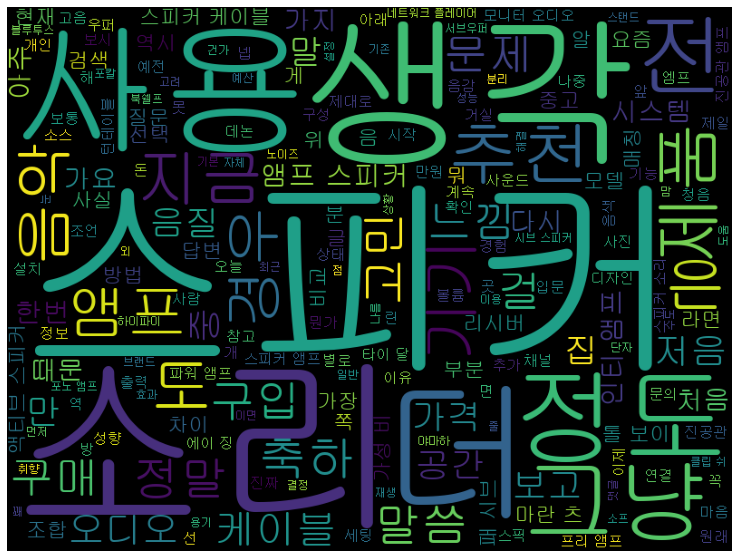

In [74]:
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [75]:
word01 = " ".join(df['doc_n_str_nouns_str'])                

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
wc = WordCloud(background_color='white', #워드클라우드 배경화면 하얀색
              width=1020, height=680, #너비랑 높이 지정
              font_path=font_path+'malgun.ttf', #글씨체 한글로 해야함
               max_font_size=120 #제일 큰 폰트 사이즈 지정
              ,max_words=100, #표시될 단어의 갯수 
               stopwords=set(['스피커']) #불용어 지정
              ).generate(word01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 1019.5, 679.5, -0.5)

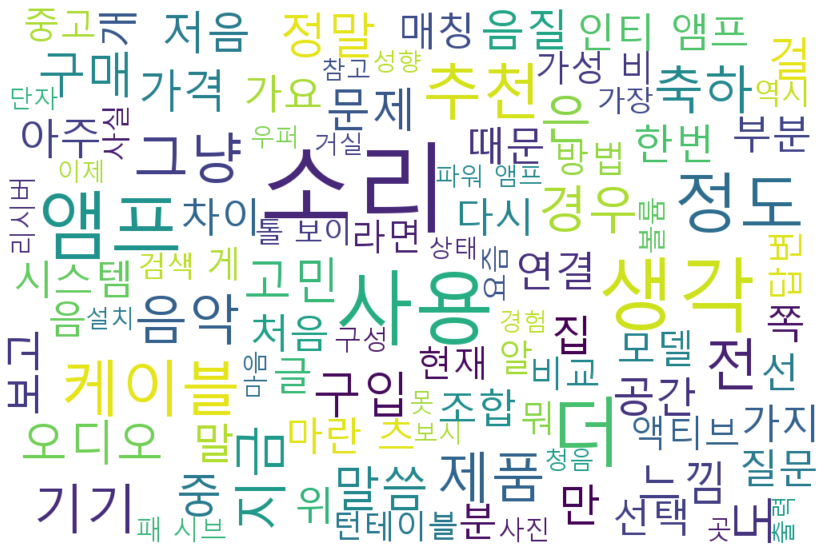

In [77]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear',cmap='YlOrBr')
plt.axis('off')